In [3]:
!pip3 install nltk

     |████████████████████████████████| 1.5MB 1.8MB/s eta 0:00:01
  Stored in directory: /Users/gabrieltiveron/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [25]:
import csv
from statistics import mode
import re
from collections import Counter

good_messages = []
bad_messages = []

good_bag = []
bad_bag = []

with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    bad_index = 0
    good_index = 0

    for rows in csv_reader:
        if(rows[1] == '1'):
            bad_messages.append(rows[2])
            if(len(bad_messages[bad_index].split(' ')) > 1):
                for message in bad_messages[bad_index].split(' '):
                    bad_bag.append(message)
            else:
                bad_bag.append(bad_messages[bad_index])
            bad_index+=1
        else:
            good_messages.append(rows[2])
            if(len(good_messages[good_index].split(' ')) > 1):
                for message in good_messages[good_index].split(' '):
                    good_bag.append(message)
            else:
                good_bag.append(good_messages[good_index])
            good_index+=1

# Separando os casos de treino entre bons e ruins
regex = re.compile(r'(\@\buser\b)|([\d]+)|(\s)|\'\'|$|([\w*]{1,2}|\&\bamp\b)')

filtered_bad = [i for i in bad_bag if not regex.match(i)]
filtered_good = [i for i in good_bag if not regex.match(i)]


bad_most_used = mode(filtered_bad)
indices_bad = [i for i, x in enumerate(filtered_bad) if x == bad_most_used]

good_most_used = mode(filtered_good)
indices_good = [i for i, x in enumerate(filtered_good) if x == good_most_used]

full_bad_bag = bad_bag
full_good_bag = good_bag

good_bag = list(set(good_bag) - set(bad_bag))
bad_bag = list(set(bad_bag) - set(good_bag))

print("BAD MOST USED:", bad_most_used, len(indices_bad))
print("GOOD MOST USED:", good_most_used, len(indices_good))
print(len(set(full_bad_bag)), "ALL BAD")
print(len(set(full_good_bag)), "ALL GOOD")
print(len(bad_bag), "ONLY BAD")
print(len(good_bag), "ONLY GOOD")

BAD MOST USED: #trump 119
GOOD MOST USED: #love 1439
8217 ALL BAD
63154 ALL GOOD
8217 ONLY BAD
58951 ONLY GOOD


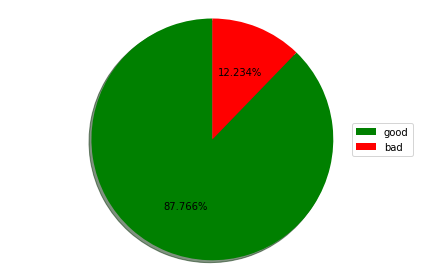

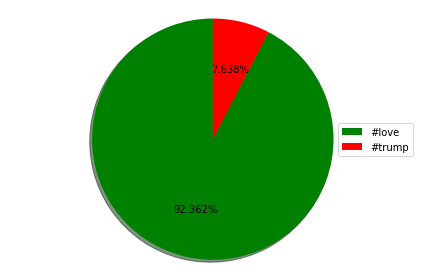

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot(labels, sizes, plot_type):
    colors = ['green', 'red']
    if(plot_type == 0):
        explode = (0.1, 0,)
        patches, texts, pct = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.3f%%')
        plt.legend(patches, labels, loc="right")
        plt.axis('equal')
        plt.tight_layout()
    else:
        index = np.arange(len(labels))
        plt.bar(index, sizes)
        plt.xlabel('Hashtags', fontsize=10)
        plt.ylabel('Ocorrencia relativa', fontsize=10)
        plt.xticks(index, labels, fontsize=10, rotation=30)
        plt.title('Ocorrencia relativa de Hashtags')

    plt.show()

message_data = {"labels": ['good', 'bad'], "sizes": [len(good_bag), len(bad_bag)]}
plot(message_data["labels"], message_data["sizes"], 0)
occurrence_data = {"labels": ['#love', "#trump"], "sizes": [len(indices_good), len(indices_bad)]}
plot(occurrence_data["labels"], occurrence_data["sizes"], 0)


# Melhor Visualização dos dados

# Análise Exploratória dos Dados

## Extração de dados importantes

Primeiramente, antes de se analisar os dados, é necessário filtra-los. Para isso foram ignoradas palavras com menos de 2 caracteres, digitos, "&amp" e "@user". Tal conjunto foi ignorado por não ter um grande valor no contexto que está em análise neste trabalho. Após este filtro, obtivemos os seguintes dados:


| Palavras sem Discurso de ódio | Palavras com Discurso de Ódio | Total |
|:--------------------:|:--------------------:| :---: |
|       58951          |        8217          | 67168 |
|       87.766%        |        7.638%       | 100%  |

Além dos dados numéricos encontrados, também é necessário analisar que, segundo o artigo "A Study on Detecting Patterns in Twitter Intra-topic User and Message Clustering" de Marc Cheong e Vincent Lee, uma das características importantes para análize de tweets é o tema das "hashtags" para ter um conjunto temático melhor a ser analizado.

Após a divisão dos dados foi extraida a moda de cada conjunto sendo elas: "#trump" com 119 ocorrências para tweets com discurso de ódio e #love com 1439 ocorrências para tweets sem discurso de ódio. Esses dados são importantes para avaliar futuros pesos dessas mesmas palavras num outro contexto. 

Para obter uma avaliação melhor será extraída a frequencia relativa de termos dentro de cada categoria, para que se tenha métricas numéricas de classificação.

Depois de separar as palavras de cada tweet e organizá-las entre "boas" e "más", será utilizada a "feature hashing" para que, com a separação de palavras, possa haver uma melhor determinação de quais tweets são de natureza maliciosa e quais não são.


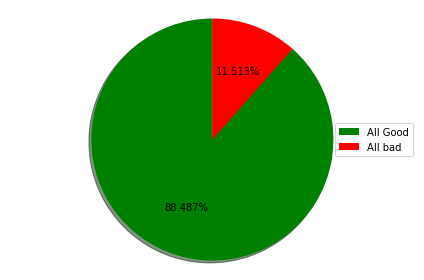

In [13]:
all_occurrences = {'labels': ['All Good', 'All bad'], 'sizes': [len(set(full_good_bag)), len(set(full_bad_bag))]}
plot(all_occurrences['labels'], all_occurrences['sizes'])

#trump 0.003315317323229509
#love 0.003016524854362012


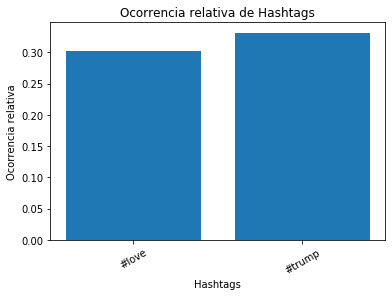

In [50]:
# Frequencia relativa dos elementos apresentados em cada modelo de classificação
import nltk
def get_ocurrence_frequency(word_list):
    frequency = nltk.FreqDist(word_list)
    return frequency

all_bad_relative_frequency = get_ocurrence_frequency(full_bad_bag)
all_good_relative_frequency = get_ocurrence_frequency(full_good_bag)

print('#trump', all_bad_relative_frequency.freq('#trump'))
print('#love', all_good_relative_frequency.freq('#love'))

frequency_data = {'labels': ['#love', '#trump'], 'sizes': [all_good_relative_frequency.freq('#love')*100,
                                                          all_bad_relative_frequency.freq('#trump')*100]}

plot(frequency_data['labels'], frequency_data['sizes'], 1)


### Frequencia Relativa
Pode-se observar que, apesar das ocorrencias totais de '#love' serem muito superiores ao numero de '#trump', as ocorrencias relativas têm um cenário invertido.